In [1]:
#On importe les librairies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#On importe les fichiers csv
veg = pd.read_csv("P3_vegetaux.csv")
ani = pd.read_csv("P3_animaux.csv")
pop = pd.read_csv("P3_population.csv")
veg_tot = pd.read_csv("P3_vegetaux_total.csv")
sous_alimentation = pd.read_csv("P3_sous_alimentation.csv")

In [3]:
#On ajoute la variable origin
ani["origin"] = "animal"
veg["origin"] = "vegetal"

In [4]:
#On regroupe veg et ani en un unique dataframe
temp = ani.append(veg)

In [5]:
#On exprime la population en unité et non 1000et on supprime la colonne Unité
pop['Valeur'] = pop.Valeur * 1000
pop = pop.drop('Unité', 1)

In [6]:
#On définit plusiers variables qu'on utilisera par la suite
ACM = 2586 #Apport Calorique Moyen exprimé en kCal/j/pers
PM = 62 #Poids Moyen d'un habitant sur Terre exprimé en kg
APM = 0.83 #Apport Protéique Moyen exprimé en g de prot/kg/j

In [7]:
#On renomme les colonnes du dataframe pop
pop.columns = ["Code Domaine","Domaine","Code Pays","Pays","Code Élément", 'Élément','Code Produit'
    ,'Produit','Code année','Année',"Valeur","Symbole",'Description du Symbole','Note']

QUESTION 1

In [8]:
#On réalise une table pivot sur la valeur de la population en utilisant la fonction somme pour avoir une pop totale
pop_tot = pop.pivot_table('Valeur', columns='Année', aggfunc='sum')

In [9]:
pop_tot

Année,2012,2013,2014,2015,2016,2017
Valeur,8.534097e+09,8.627069e+09,8.719542e+09,8.811148e+09,8.901712e+09,8.991167e+09


In [10]:
#La population mondiale semble surestimée
#Il y a peut-être des doublons donc on visualise les pays représentés
for x in pop.itertuples():
  print(x.Pays)

Afghanistan
Afghanistan
Afghanistan
Afghanistan
Afghanistan
Afghanistan
Afrique du Sud
Afrique du Sud
Afrique du Sud
Afrique du Sud
Afrique du Sud
Afrique du Sud
Albanie
Albanie
Albanie
Albanie
Albanie
Albanie
Algérie
Algérie
Algérie
Algérie
Algérie
Algérie
Allemagne
Allemagne
Allemagne
Allemagne
Allemagne
Allemagne
Andorre
Andorre
Andorre
Andorre
Andorre
Andorre
Angola
Angola
Angola
Angola
Angola
Angola
Anguilla
Anguilla
Anguilla
Anguilla
Anguilla
Anguilla
Antigua-et-Barbuda
Antigua-et-Barbuda
Antigua-et-Barbuda
Antigua-et-Barbuda
Antigua-et-Barbuda
Antigua-et-Barbuda
Arabie saoudite
Arabie saoudite
Arabie saoudite
Arabie saoudite
Arabie saoudite
Arabie saoudite
Argentine
Argentine
Argentine
Argentine
Argentine
Argentine
Arménie
Arménie
Arménie
Arménie
Arménie
Arménie
Aruba
Aruba
Aruba
Aruba
Aruba
Aruba
Australie
Australie
Australie
Australie
Australie
Australie
Autriche
Autriche
Autriche
Autriche
Autriche
Autriche
Azerbaïdjan
Azerbaïdjan
Azerbaïdjan
Azerbaïdjan
Azerbaïdjan
Azerbaïdja

In [11]:
#La Chine est comptabilisée plusieurs fois donc on récupère les index des différentes dépendances de la Chine
pop[pop['Pays']=='Chine, Taiwan Province de'].index.item

<bound method IndexOpsMixin.item of Int64Index([252, 253, 254, 255, 256, 257], dtype='int64')>

In [12]:
#On supprime les index des dépendances de la Chine
pop_2 = pop.drop(pop.index[[234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,
                           252,253,254,255,256,257]])

In [13]:
#Nouvelle table pivot sur la population hors doublons de la Chine
pop_tot2 = pop_2.pivot_table('Valeur', columns='Année', aggfunc='sum')

In [14]:
pop_tot2

Année,2012,2013,2014,2015,2016,2017
Valeur,7.127966e+09,7.213212e+09,7.298235e+09,7.382787e+09,7.466740e+09,7.550036e+09


In [15]:
#Pour la suite des questions on s'intéressera uniquement à l'année 2013
pop2013 = pop_2[pop_2["Année"] == 2013]
temp2013 = temp[temp["Année"] == 2013]
veg_tot2013 = veg_tot[veg_tot["Année"] == 2013]

QUESTION 2 = PAS DE CODAGE

NETTOYAGE ET CREATION DE LA BASE DE DONNEES

In [16]:
#On filtre le fichier population en 2013 sur quelques colonnes
pop3 = pop2013.filter(['Pays', 'Valeur'], axis=1)

In [17]:
#On fait une jointure interne entre temp2013 et pop3 pour ajouter la population en tant que colonne
temp2 = pd.merge(pop3, temp2013, how='inner', on=['Pays'])

In [18]:
#On renomme les colonnes de la jointure
temp2.columns = ["country","population","xx1","xx2","country_code", 'xx3','element'
    ,'item_code','item','xx4',"year","unit","value",'xx5','xx6'
    ,'origin']

In [19]:
#On transforme le dataframe en table pivot
data = temp2.pivot_table(
    index=["country_code","country","item_code","item","year","origin","population"],
    columns='element', values="value", aggfunc=sum)

In [20]:
#On renomme les colonnes de la table
data.columns = ['Feed', 'Other_uses', 'Food_supply',
    'Food_supply_quantity', 'Fat_supply_quantity', 
    'Protein_supply_quantity', 'Domestic_supply_quantity', 'Export_Quantity',
    'Import_Quantity', 'Food', 'Losses',
    'Production', 'Seed', 'Processed', 'Stock_Variation']
data = data.reset_index()

In [21]:
data.head()

,country_code,country,item_code,item,year,origin,population,Feed,Other_uses,Food_supply,...,Protein_supply_quantity,Domestic_supply_quantity,Export_Quantity,Import_Quantity,Food,Losses,Production,Seed,Processed,Stock_Variation
0,1,Arménie,2511,Blé,2013,vegetal,2893509.0,93.0,0.0,1024.0,...,30.52,554.0,1.0,361.0,389.0,32.0,312.0,30.0,10.0,-118.0
1,1,Arménie,2513,Orge,2013,vegetal,2893509.0,137.0,26.0,0.0,...,0.00,198.0,0.0,9.0,0.0,15.0,189.0,14.0,7.0,0.0
2,1,Arménie,2514,Maïs,2013,vegetal,2893509.0,96.0,NaN,0.0,...,0.01,102.0,NaN,82.0,0.0,7.0,21.0,0.0,NaN,NaN
3,1,Arménie,2515,Seigle,2013,vegetal,2893509.0,1.0,NaN,1.0,...,0.02,1.0,NaN,0.0,0.0,0.0,1.0,0.0,NaN,0.0
4,1,Arménie,2516,Avoine,2013,vegetal,2893509.0,4.0,NaN,2.0,...,0.09,6.0,NaN,1.0,1.0,0.0,5.0,0.0,NaN,NaN


QUESTION 3

In [22]:
#On calcule les différentes disponibilités demandées
data['Dispo_kCal'] = data.population * 365 * data.Food_supply
data['Dispo_kg'] = data.population * data.Food_supply_quantity
data['Dispo_kg_proteins'] = (data.Protein_supply_quantity * data.population * 365) / 1000

In [23]:
#On trie en supprimant les dispo égales à 0
data = data[data['Dispo_kg'] > 0]
data = data[data['Dispo_kCal'] > 0]

In [24]:
#On filtre les données pour plus de clarté
Question3 = data.filter(['country','item','origin', 'Dispo_kCal', 'Dispo_kg'], axis=1)

In [25]:
Question3.head()

,country,item,origin,Dispo_kCal,Dispo_kg
0,Arménie,Blé,vegetal,1.081478e+12,3.778923e+08
3,Arménie,Seigle,vegetal,1.056131e+09,3.472211e+05
4,Arménie,Avoine,vegetal,2.112262e+09,1.070598e+06
7,Arménie,"Céréales, Autres",vegetal,1.478583e+10,5.671278e+06
8,Arménie,Pommes de Terre,vegetal,8.660272e+10,1.304973e+08


QUESTION 4

In [26]:
#On définit le ratio énergie/poids de la façon suivante
data['Ratio'] = data.Dispo_kCal / data.Dispo_kg
data['Protein'] = (data.Dispo_kg_proteins / data.Dispo_kg) * 100

In [27]:
#On filtre les données pour plus de clarté
Question4 = data.filter(['country','item','origin', 'Dispo_kCal', 'Dispo_kg', 'Ratio', 'Protein'], axis=1)

In [28]:
Question4.head()

,country,item,origin,Dispo_kCal,Dispo_kg,Ratio,Protein
0,Arménie,Blé,vegetal,1.081478e+12,3.778923e+08,2861.868300,8.529709
3,Arménie,Seigle,vegetal,1.056131e+09,3.472211e+05,3041.666667,6.083333
4,Arménie,Avoine,vegetal,2.112262e+09,1.070598e+06,1972.972973,8.878378
7,Arménie,"Céréales, Autres",vegetal,1.478583e+10,5.671278e+06,2607.142857,7.262755
8,Arménie,Pommes de Terre,vegetal,8.660272e+10,1.304973e+08,663.636364,1.570067


In [29]:
#On définie une fonction de localisation en fonction de l'item - non obligatoire
dfitem2 = Question4.set_index('item')

In [30]:
#On calcule la valeur calorique moyenne des oeufs
#La division par 10 vient du fait qu'on transforme les kg en g et qu'on exprime la valeur calorique pour 100 g de produit
Valeur_calorique = dfitem2.pivot_table('Ratio', columns='item', aggfunc='mean') / 10
print('La valeur calorique moyenne exprimée en kCal du produit est de')
Valeur_calorique['Orge']

La valeur calorique moyenne exprimée en kCal du produit est de


Ratio    254.040518
Name: Orge, dtype: float64

QUESTION 5

In [31]:
#On regroupe les ratios par item et on calcule la moyenne
top5_ratio = Question4.groupby(['item'])['Ratio'].mean()

In [32]:
#On affiche les 20 meilleurs rapports energie/poids et on choisit 5 d'entre eux
top5_ratio.sort_values(ascending = False).head(20)

item
Huiles de Foie de Poisso    11809.003531
Huile de Sésame             10192.188616
Huile de Son de Riz          9314.765053
Huile d'Olive                9301.823385
Huile de Germe de Maïs       9278.454590
Huile de Colza&Moutarde      9157.170010
Huile d'Arachide             9118.384270
Huile de Tournesol           9041.569959
Huile de Palmistes           9010.065306
Huile Graines de Coton       8967.670727
Huiles de Poissons           8917.431319
Huile de Coco                8913.579691
Huile de Soja                8901.300904
Huile de Palme               8791.492506
Huil Plantes Oleif Autr      8714.007499
Graisses Animales Crue       7590.532115
Beurre, Ghee                 7489.824503
Sésame                       6142.036023
Arachides Decortiquees       5705.037380
Palmistes                    5475.000000
Name: Ratio, dtype: float64

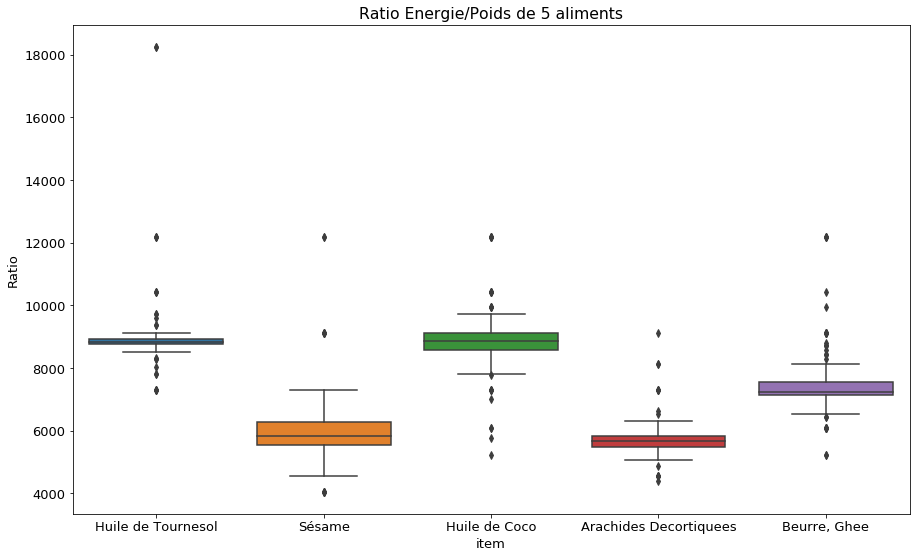

In [33]:
fig = plt.figure(1, figsize=(15, 9))
plt.rcParams.update({ 'font.size' : 13})
plt.title("Ratio Energie/Poids de 5 aliments")
ax = sns.boxplot(x="item", y="Ratio", data=Question4, order=["Huile de Tournesol", "Sésame",
                                                             "Huile de Coco", "Arachides Decortiquees", "Beurre, Ghee"])

In [34]:
#On regroupe les taux de protéines et on calcule la moyenne
top5_protein = Question4.groupby(['item'])['Protein'].mean()

In [35]:
#On affiche les 20 meilleurs taux de protéines et on choisit 5 d'entre eux
top5_protein.sort_values(ascending = False).head(20)

item
Soja                        31.753451
Arachides Decortiquees      25.028144
Pois                        22.297166
Légumineuses Autres         22.149204
Haricots                    21.855126
Plantes Oleiferes, Autre    18.183118
Sésame                      18.031160
Abats Comestible            17.616939
Viande, Autre               17.525760
Aliments pour enfants       15.331439
Viande de Bovins            14.456889
Cephalopodes                14.405657
Viande d'Ovins/Caprins      13.861137
Viande de Volailles         12.623639
Poissons Pelagiques         12.323581
Piments                     12.220894
Graines de tournesol        11.605517
Poissons Marins, Autres     11.444467
Graines Colza/Moutarde      10.950000
Épices, Autres              10.878666
Name: Protein, dtype: float64

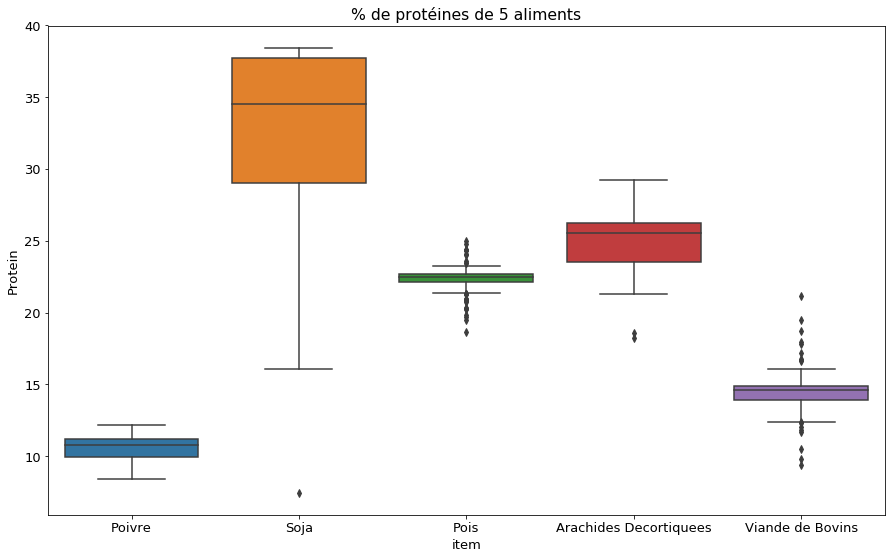

In [36]:
fig = plt.figure(1, figsize=(15, 9))
plt.rcParams.update({ 'font.size' : 13})
plt.title("% de protéines de 5 aliments")
ax = sns.boxplot(x="item", y="Protein", data=Question4, order=["Poivre", "Soja",
                                                             "Pois", "Arachides Decortiquees", "Viande de Bovins"])

QUESTION 6

In [37]:
#Il faut d'abord supprimer les doublons de la Chine avant de faire la jointure avec pop
veg_tot2013[veg_tot2013['Pays']=='Chine - RAS de Hong-Kong'].index.item

<bound method IndexOpsMixin.item of Int64Index([199, 201, 203], dtype='int64')>

In [38]:
#On supprime les index des dépendances de la Chine
veg_tot2 = veg_tot2013.drop(veg_tot2013.index[[199,201,203,205,207,209,211,213,215,217,219,221]])

In [39]:
#On fait une jointure interne entre veg_tot et pop pour ajouter la population en tant que colonne
temp3 = pd.merge(pop3, veg_tot2, how='inner', on=['Pays'])

In [40]:
#On renomme les colonnes de la jointure
temp3.columns = ["country","population","xx","xx2","country_code", 'xx3','element'
    ,'item_code','item','xx4',"year","unit","value",'xx5','xx6']

In [41]:
#On transforme le dataframe en table pivot
data2 = temp3.pivot_table(
    index=["country_code","country","item_code","item","year","population"],
    columns='element', values="value", aggfunc=sum)

In [42]:
#On renomme les colonnes de la table
data2.columns = ['Domestic_supply_quantity','Fat_supply_quantity', 
    'Protein_supply_quantity']
data2 = data2.reset_index()

In [43]:
data2['Dispo_intern'] = data2.population * 365 * data2.Domestic_supply_quantity
print("La disponibilité intérieure mondiale en végétaux est de", data2['Dispo_intern'].sum(), "kCal")

La disponibilité intérieure mondiale en végétaux est de 5041103769109600.0 kCal


QUESTION 7

In [44]:
food_pop = data2.Dispo_intern / (365 * ACM)
print("En utilisant la totalité de la disponibilité intérieure mondiale en végétaux en tant que nourriture, on pourrait nourrir", food_pop.sum(), "habitants")
print("soit", food_pop.sum()/pop_tot2.iloc[0,1] * 100, "% de la population mondiale")

En utilisant la totalité de la disponibilité intérieure mondiale en végétaux en tant que nourriture, on pourrait nourrir 5340774633.812839 habitants
soit 74.0415631911845 % de la population mondiale


In [45]:
#D'après la littérature in faut en moyenne un apport de 0,83 g/kg de protéines et le terrien pèse en moyenne 62 kg
food_pop_protein = (data2.Protein_supply_quantity * data2.population) / (APM * PM)
print("En utilisant la disponibilité annuelle en protéines, on pourrait nourrir", food_pop_protein.sum(), "habitants")
print("soit", food_pop_protein.sum()/pop_tot2.iloc[0,1] * 100, "% de la population mondiale")

En utilisant la disponibilité annuelle en protéines, on pourrait nourrir 6706296612.447726 habitants
soit 92.97240914561604 % de la population mondiale


QUESTION 8

In [46]:
#On reprend le premier data et on additionne les 3 catégories demandées et en transforme les milliers de tonnes en kg
data['Dispo_kg_2'] = (data.Feed + data.Food + data.Losses) * 1000000

In [47]:
#On recalcule la dispo en calories en utilisant le ratio précédemment calculé
data['Dispo_kCal_2'] = data.Dispo_kg_2 * data.Ratio

In [48]:
data['Dispo_kg_proteins_2'] = (data.Dispo_kg_2 * data.Protein) / 100

In [49]:
#On regroupe par origine des produits - végétaux vs animaux
origin = data.groupby('origin').sum()

In [50]:
origin

,country_code,item_code,year,population,Feed,Other_uses,Food_supply,Food_supply_quantity,Fat_supply_quantity,Protein_supply_quantity,...,Processed,Stock_Variation,Dispo_kCal,Dispo_kg,Dispo_kg_proteins,Ratio,Protein,Dispo_kg_2,Dispo_kCal_2,Dispo_kg_proteins_2
origin,,,,,,,,,,,,,,,,,,,,,
animal,306505,6655241,4867434,1.038306e+11,106674.0,36703.0,93777.0,33643.49,6580.62,6233.71,...,1000.0,3793.0,1.316912e+15,1.184667e+12,8.206461e+10,5.122602e+06,24165.635391,5.535440e+11,3.306144e+14,1.893841e+10
vegetal,923688,18786657,14600289,3.363133e+11,1094467.0,766364.0,391350.0,86221.46,8134.91,7547.82,...,1211131.0,-106277.0,6.090345e+15,3.708907e+12,1.258935e+11,2.357317e+07,36149.012914,3.205384e+12,6.154334e+15,1.598749e+11


In [51]:
food_pop_2 = origin.loc['vegetal','Dispo_kCal_2'] / (365 * ACM)
print("En utilisant la totalité feed + food + losses, on pourrait nourrir", food_pop_2, "habitants")
print("soit", food_pop_2/pop_tot2.iloc[0,1] * 100, "% de la population mondiale")

En utilisant la totalité feed + food + losses, on pourrait nourrir 6520181537.028435 habitants
soit 90.39221206516899 % de la population mondiale


In [52]:
food_pop_2_protein = origin.loc['vegetal','Dispo_kg_proteins_2'] / (APM * PM * 365 *0.001)
print("En utilisant la totalité feed + food + losses, on pourrait nourrir", food_pop_2_protein, "habitants")
print("soit", food_pop_2_protein/pop_tot2.iloc[0,1] * 100, "% de la population mondiale")

En utilisant la totalité feed + food + losses, on pourrait nourrir 8511725469.9144745 habitants
soit 118.00188220950358 % de la population mondiale


QUESTION 9

In [53]:
food_pop_3 = (data.Food_supply * data.population) / ACM
print("En utilisant la disponibilité alimentaire mondiale, on pourrait nourir", food_pop_3.sum(), "habitants")
print("soit", food_pop_3.sum()/pop_tot2.iloc[0,1] * 100, "% de la population mondiale")

En utilisant la disponibilité alimentaire mondiale, on pourrait nourir 7847585129.880123 habitants
soit 108.79460567640594 % de la population mondiale


In [54]:
food_pop_3_protein = (data.Protein_supply_quantity * data.population) / (APM * PM)
print("En utilisant la disponibilité mondiale en protéines, on pourrait nourrir", food_pop_3_protein.sum(), "habitants")
print("soit", food_pop_3_protein.sum()/pop_tot2.iloc[0,1] * 100, "% de la population mondiale")

En utilisant la disponibilité mondiale en protéines, on pourrait nourrir 11071674160.355421 habitants
soit 153.49160340639983 % de la population mondiale


QUESTION 10

In [55]:
sous_alimentation['Année'].replace(to_replace=['2011-2013', '2012-2014', '2013-2015', '2014-2016', '2015-2017'],
    value=['2012', '2013', '2014', '2015', '2016'], inplace=True)

In [56]:
#Il faut d'abord supprimer les doublons de la Chine
sous_alimentation[sous_alimentation['Zone']=='Chine, Taiwan Province de'].index.item

<bound method IndexOpsMixin.item of Int64Index([205, 206, 207, 208, 209], dtype='int64')>

In [57]:
#On supprime l'index 76 à 83 de la Chine (dépendances de la Chine déjà présentes dans l'indicatif Chine)
sous_alim = sous_alimentation.drop(sous_alimentation.index[[190,191,192,193,194,195,196,197,198,199,200,201,202,
                                                           203,204,205,206,207,208,209]])

In [58]:
#On transforme les données inférieures à en nombre
sous_alim['Valeur'].replace(regex=True, inplace=True, to_replace=r'\<', value=r'')

In [59]:
#On transforme le type d'objet en nombres
sous_alim['Valeur'] = pd.to_numeric(sous_alim['Valeur'], errors='coerce')

In [60]:
#On passe de millions de personnes en unités
sous_alim['Valeur'] = sous_alim.Valeur * 1000000

In [61]:
sous_alim2 = sous_alim.pivot_table('Valeur', columns='Année', aggfunc='sum')

In [62]:
sous_alim2

Année,2012,2013,2014,2015,2016
Valeur,793200000.0,782300000.0,774300000.0,775400000.0,785700000.0


In [63]:
print("Il y avait en 2013", sous_alim2.iloc[0,1]/pop_tot2.iloc[0,1] * 100, "% de la population mondiale sous alimentée")
print("Il y avait en 2016", sous_alim2.iloc[0,4]/pop_tot2.iloc[0,4] * 100, "% de la population mondiale sous alimentée")

Il y avait en 2013 10.845377095253308 % de la population mondiale sous alimentée
Il y avait en 2016 10.52266401207215 % de la population mondiale sous alimentée


QUESTION 11

In [64]:
#On définit une fonction d'appartenance au type céréales
produit_cereals = ['Blé', 'Riz (Eq Blanchi)', 'Orge', 'Maïs', 'Millet', 'Céréales, Autres',
                   'Seigle', 'Avoine', 'Sorgho']

In [65]:
data['Céréales'] = data.item.isin(produit_cereals)

In [66]:
data.head()

,country_code,country,item_code,item,year,origin,population,Feed,Other_uses,Food_supply,...,Stock_Variation,Dispo_kCal,Dispo_kg,Dispo_kg_proteins,Ratio,Protein,Dispo_kg_2,Dispo_kCal_2,Dispo_kg_proteins_2,Céréales
0,1,Arménie,2511,Blé,2013,vegetal,2893509.0,93.0,0.0,1024.0,...,-118.0,1.081478e+12,3.778923e+08,3.223311e+07,2861.868300,8.529709,514000000.0,1.471000e+12,4.384270e+07,True
3,1,Arménie,2515,Seigle,2013,vegetal,2893509.0,1.0,NaN,1.0,...,0.0,1.056131e+09,3.472211e+05,2.112262e+04,3041.666667,6.083333,1000000.0,3.041667e+09,6.083333e+04,True
4,1,Arménie,2516,Avoine,2013,vegetal,2893509.0,4.0,NaN,2.0,...,NaN,2.112262e+09,1.070598e+06,9.505177e+04,1972.972973,8.878378,5000000.0,9.864865e+09,4.439189e+05,True
7,1,Arménie,2520,"Céréales, Autres",2013,vegetal,2893509.0,1.0,12.0,14.0,...,0.0,1.478583e+10,5.671278e+06,4.118910e+05,2607.142857,7.262755,8000000.0,2.085714e+10,5.810204e+05,True
8,1,Arménie,2531,Pommes de Terre,2013,vegetal,2893509.0,225.0,16.0,82.0,...,15.0,8.660272e+10,1.304973e+08,2.048894e+06,663.636364,1.570067,455000000.0,3.019545e+11,7.143803e+06,False


In [67]:
cereals = data[data['Céréales'] == True]

In [68]:
cereals.head()

,country_code,country,item_code,item,year,origin,population,Feed,Other_uses,Food_supply,...,Stock_Variation,Dispo_kCal,Dispo_kg,Dispo_kg_proteins,Ratio,Protein,Dispo_kg_2,Dispo_kCal_2,Dispo_kg_proteins_2,Céréales
0,1,Arménie,2511,Blé,2013,vegetal,2893509.0,93.0,0.0,1024.0,...,-118.0,1.081478e+12,3.778923e+08,3.223311e+07,2861.868300,8.529709,514000000.0,1.471000e+12,4.384270e+07,True
3,1,Arménie,2515,Seigle,2013,vegetal,2893509.0,1.0,NaN,1.0,...,0.0,1.056131e+09,3.472211e+05,2.112262e+04,3041.666667,6.083333,1000000.0,3.041667e+09,6.083333e+04,True
4,1,Arménie,2516,Avoine,2013,vegetal,2893509.0,4.0,NaN,2.0,...,NaN,2.112262e+09,1.070598e+06,9.505177e+04,1972.972973,8.878378,5000000.0,9.864865e+09,4.439189e+05,True
7,1,Arménie,2520,"Céréales, Autres",2013,vegetal,2893509.0,1.0,12.0,14.0,...,0.0,1.478583e+10,5.671278e+06,4.118910e+05,2607.142857,7.262755,8000000.0,2.085714e+10,5.810204e+05,True
87,1,Arménie,2805,Riz (Eq Blanchi),2013,vegetal,2893509.0,0.0,NaN,34.0,...,0.0,3.590845e+10,9.201359e+06,6.970463e+05,3902.515723,7.575472,NaN,NaN,NaN,True


In [69]:
cereals['alim_animal'] = (cereals.Feed / (cereals.Food + cereals.Feed)) * 100

C:\Users\alexa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
cereals = cereals.filter(['item', 'country', 'alim_animal'], axis=1)

In [71]:
#On trie en supprimant les dispo égales à 0
cereals = cereals[cereals['alim_animal'] > 0]

In [72]:
#On réalise une table pivot pour obtenir la proportion de Feed pour chaque type de céréale
cereals2 = cereals.pivot_table(columns='item', aggfunc='mean')

In [73]:
cereals2

item,Avoine,Blé,"Céréales, Autres",Maïs,Millet,Orge,Riz (Eq Blanchi),Seigle,Sorgho
alim_animal,76.000932,27.837358,65.849035,64.663974,27.61419,79.348701,12.958285,48.170708,29.638584


In [74]:
cereals3 = cereals['alim_animal'].mean()
print("Dans le monde,", cereals3, "% des céréales sont déstinées à l'alimentation animale")

Dans le monde, 51.391497950734 % des céréales sont déstinées à l'alimentation animale


QUESTION 12

In [75]:
#On définit la sous-alimentation pour l'année 2013
SA2013 = sous_alim[sous_alim['Année'] == '2013']

In [76]:
#On filtre sur quelques colonnes
SA2013 = SA2013.filter(['Zone', 'Produit', 'Valeur'], axis=1)

In [77]:
#On renomme les colonnes
SA2013.columns = ['Pays', 'Produit', 'Valeur']

In [78]:
#On réalise une jointure entre le dataframe sur les bilans alimentaires et celui sur la sous-alimentation en 2013
temp4 = pd.merge(temp, SA2013.dropna(), how='inner',on=['Pays'])

In [79]:
temp4.head(1)

,Code Domaine,Domaine,Code Pays,Pays,Code Élément,Élément,Code Produit,Produit_x,Code Année,Année,Unité,Valeur_x,Symbole,Description du Symbole,origin,Produit_y,Valeur_y
0,FBS,Bilans Alimentaires,2,Afghanistan,5511,Production,2731,Viande de Bovins,2012,2012,Milliers de tonnes,139.0,S,Données standardisées,animal,Nombre de personnes sous-alimentées (millions)...,8100000.0


In [80]:
SN15 = temp4.pivot_table('Valeur_x', 'Produit_x', columns='Élément', aggfunc='sum'
                        ).sort_values(by = ['Exportations - Quantité'], ascending = False)

In [81]:
print("Voici les 15 produits les plus exportés au monde (en milliers de tonnes)")
SN15.filter(['Exportations - Quantité'], axis=1).head(15)

Voici les 15 produits les plus exportés au monde (en milliers de tonnes)


Élément,Exportations - Quantité
Produit_x,
Blé,398401.0
Maïs,253477.0
Lait - Excl Beurre,247611.0
Soja,204306.0
Sucre Eq Brut,131309.0
Huile de Palme,98966.0
"Légumes, Autres",87680.0
Riz (Eq Blanchi),82597.0
Orge,80489.0


In [82]:
#On définit une fonction qui appelle les 15 produits les plus exportés au monde
def top15(x):
    if x == 'Blé':
        return 'top15'
    elif x == 'Maïs':
        return 'top15'
    elif x == 'Lait - Excl Beurre':
        return 'top15'
    elif x == 'Soja':
        return 'top15'
    elif x == 'Sucre Eq Brut':
        return 'top15'
    elif x == 'Huile de Palme':
        return 'top15'
    elif x == 'Légumes, Autres':
        return 'top15'
    elif x == 'Orge':
        return 'top15'
    elif x == 'Riz (Eq Blanchi)':
        return 'top15'
    elif x == 'Oranges, Mandarines':
        return 'top15'
    elif x == 'Manioc':
        return 'top15'
    elif x == 'Fruits, Autres':
        return 'top15'
    elif x == 'Pommes de Terre':
        return 'top15'
    elif x == 'Poissons Pelagiques':
        return 'top15'
    elif x == 'Tomates':
        return 'top15'
    else:
        'out_top15'

In [83]:
#On applique la fonction pour sélectionner le top 15 des exportations mondiales
temp4['top_15'] = temp4['Produit_x'].apply(lambda x: top15(x))

In [84]:
top15 = temp4[temp4['top_15'] == 'top15']

In [85]:
top15.head()

,Code Domaine,Domaine,Code Pays,Pays,Code Élément,Élément,Code Produit,Produit_x,Code Année,Année,Unité,Valeur_x,Symbole,Description du Symbole,origin,Produit_y,Valeur_y,top_15
142,FBS,Bilans Alimentaires,2,Afghanistan,5511,Production,2848,Lait - Excl Beurre,2012,2012,Milliers de tonnes,1845.0,S,Données standardisées,animal,Nombre de personnes sous-alimentées (millions)...,8100000.0,top15
143,FBS,Bilans Alimentaires,2,Afghanistan,5511,Production,2848,Lait - Excl Beurre,2013,2013,Milliers de tonnes,1835.0,S,Données standardisées,animal,Nombre de personnes sous-alimentées (millions)...,8100000.0,top15
144,FBS,Bilans Alimentaires,2,Afghanistan,5611,Importations - Quantité,2848,Lait - Excl Beurre,2012,2012,Milliers de tonnes,229.0,S,Données standardisées,animal,Nombre de personnes sous-alimentées (millions)...,8100000.0,top15
145,FBS,Bilans Alimentaires,2,Afghanistan,5611,Importations - Quantité,2848,Lait - Excl Beurre,2013,2013,Milliers de tonnes,248.0,S,Données standardisées,animal,Nombre de personnes sous-alimentées (millions)...,8100000.0,top15
146,FBS,Bilans Alimentaires,2,Afghanistan,5911,Exportations - Quantité,2848,Lait - Excl Beurre,2012,2012,Milliers de tonnes,0.0,S,Données standardisées,animal,Nombre de personnes sous-alimentées (millions)...,8100000.0,top15


In [86]:
#Parmi les 15 produits les plus exportés on sélectionne les 200 plus grandes importations
Imports = top15.pivot_table('Valeur_x', index=['Pays', 'Produit_x'], columns='Élément')

In [87]:
Imports = Imports.filter(['Aliments pour animaux', 'Autres Utilisations', 'Disponibilité intérieure',
                          'Importations - Quantité', 'Nourriture'], axis=1)

In [88]:
print("Voici les 200 plus grandes importations (exprimées en milliers de tonnes)")
Imports.sort_values(by = 'Importations - Quantité', ascending = False).head(200)

Voici les 200 plus grandes importations (exprimées en milliers de tonnes)


Élément                                             Aliments pour animaux  \
Pays                           Produit_x                                    
Chine                          Soja                                8279.5   
                               Manioc                             22515.0   
Japon                          Maïs                               10910.5   
Arabie saoudite                Orge                                9000.0   
Égypte                         Blé                                 4330.0   
Chine                          Maïs                              148976.0   
                               Lait - Excl Beurre                  1629.5   
République de Corée            Maïs                                5975.5   
Mexique                        Maïs                               12339.0   
Allemagne                      Lait - Excl Beurre                  2076.0   
Inde                           Huile de Palme                         NaN   
Italie                         Lait - Excl Beurre                   554.5   
Brésil                         Blé                                  400.0   
Chine                          Poissons Pelagiques                 9575.0   
                               Huile de Palme                         0.0   
Indonésie                      Blé                                  195.0   
États-Unis d'Amérique          Légumes, Autres                      187.0   
Chine                          Blé                                26272.0   
Italie                         Blé                                 1772.5   
Japon                          Blé                                 1214.0   
Algérie                        Blé                                  590.0   
Espagne                        Maïs                                8560.0   
Égypte                         Maïs                                7236.0   
Royaume-Uni                    Lait - Excl Beurre                  1293.5   
République de Corée            Blé                                 2359.0   
États-Unis d'Amérique          Lait - Excl Beurre                   480.5   
Pays-Bas                       Oranges, Mandarines                    NaN   
                               Lait - Excl Beurre                   697.0   
Allemagne                      Blé                                 7681.0   
Chine                          Sucre Eq Brut                          NaN   
...                                                                   ...   
Afrique du Sud                 Riz (Eq Blanchi)                       NaN   
Norvège                        Poissons Pelagiques                 1300.5   
Royaume-Uni                    Tomates                                NaN   
Espagne                        Sucre Eq Brut                          0.0   
Turquie                        Soja                                   NaN   
Afghanistan                    Blé                                    NaN   
Canada                         Sucre Eq Brut                          NaN   
Irlande                        Lait - Excl Beurre                   558.0   
Égypte                         Lait - Excl Beurre                   900.0   
États-Unis d'Amérique          Huile de Palme                         NaN   
Émirats arabes unis            Riz (Eq Blanchi)                       9.0   
Chine                          Pommes de Terre                    20738.0   
Canada                         Fruits, Autres                         NaN   
Arabie saoudite                Riz (Eq Blanchi)                       3.0   
Turquie                        Maïs                                3537.0   
Iran (République islamique d') Orge                                3604.5   
Indonésie                      Riz (Eq Blanchi)                    1852.5   
Bangladesh                     Huile de Palme                         NaN   
Côte d'Ivoire                  Riz (Eq Blanchi)                     172.0

In [89]:
#On renomme les colonnes du dataframe Imports
Imports.columns = ["Feed","Other_uses","Dispo_intern","Importations","Food"]

In [90]:
Imports['OU_DI'] = Imports.Other_uses / Imports.Dispo_intern
Imports['Fe_FeFo'] = Imports.Feed / (Imports.Feed + Imports.Food)

In [91]:
#On trie en supprimant les dispo égales à 0
Imports = Imports[Imports['OU_DI'] > 0]
Imports = Imports[Imports['Fe_FeFo'] > 0]

In [92]:
Imports = Imports.dropna()

In [93]:
importations = Imports.groupby('Produit_x').mean()

In [94]:
OU_DI = importations.filter(['OU_DI'], axis=1)

In [95]:
Fe_FeFo = importations.filter(['Fe_FeFo'], axis=1)

In [96]:
print("Voici les 3 produits possédant le ratio Autres utilisations - Disponibilité intérieure le plus élevé")
OU_DI.sort_values(by = 'OU_DI', ascending = False).head(3)

Voici les 3 produits possédant le ratio Autres utilisations - Disponibilité intérieure le plus élevé


,OU_DI
Produit_x,
Sucre Eq Brut,0.192639
Manioc,0.188654
"Oranges, Mandarines",0.119134


In [99]:
print("Voici les 3 produits possédant le ratio déstiné à l'alimentation des animaux le plus élevé")
Fe_FeFo.sort_values(by = 'Fe_FeFo', ascending = False).head(3)

Voici les 3 produits possédant le ratio déstiné à l'alimentation des animaux le plus élevé


,Fe_FeFo
Produit_x,
Soja,0.866410
Orge,0.853667
Maïs,0.690909


QUESTION 13

In [101]:
cereals_bis = data[data['Céréales'] == True]

In [102]:
#On sélectionne les USA dans le dataframe sur les céréales
USA = cereals_bis[cereals_bis['country'] == "États-Unis d'Amérique"]

In [103]:
USA_feed = USA.filter(['item', 'Feed', 'Ratio'], axis=1).dropna()

In [104]:
USA_feed['Exces_cereals'] = USA_feed.Feed * 0.1

In [105]:
print("En supprimant 10% des céréales utilisées pour l'alimentation animale, les USA économiseraient",
     (USA_feed['Exces_cereals'].sum() * 1000).round(2), "tonnes de céréales")

En supprimant 10% des céréales utilisées pour l'alimentation animale, les USA économiseraient 13970200.0 tonnes de céréales


In [106]:
print("En supprimant 10% des céréales utilisées pour l'alimentation animale, les USA pourraient nourrir",
      ((USA_feed['Exces_cereals'].sum() * 1000000 * USA_feed['Ratio'].mean()) / (365 * ACM)).astype(int),
      "personnes supplémentaires")

En supprimant 10% des céréales utilisées pour l'alimentation animale, les USA pourraient nourrir 42218774 personnes supplémentaires


QUESTION 14

In [107]:
#On filtre pour ne garder que la population
pop2013 = pop2013.filter(['Pays','Valeur'], axis=1)

In [108]:
#On réalise une jointure entre le top15 et la population
temp5 = pd.merge(top15, pop2013, how='inner', on='Pays')

In [109]:
temp5.head()

,Code Domaine,Domaine,Code Pays,Pays,Code Élément,Élément,Code Produit,Produit_x,Code Année,Année,Unité,Valeur_x,Symbole,Description du Symbole,origin,Produit_y,Valeur_y,top_15,Valeur
0,FBS,Bilans Alimentaires,2,Afghanistan,5511,Production,2848,Lait - Excl Beurre,2012,2012,Milliers de tonnes,1845.0,S,Données standardisées,animal,Nombre de personnes sous-alimentées (millions)...,8100000.0,top15,31731688.0
1,FBS,Bilans Alimentaires,2,Afghanistan,5511,Production,2848,Lait - Excl Beurre,2013,2013,Milliers de tonnes,1835.0,S,Données standardisées,animal,Nombre de personnes sous-alimentées (millions)...,8100000.0,top15,31731688.0
2,FBS,Bilans Alimentaires,2,Afghanistan,5611,Importations - Quantité,2848,Lait - Excl Beurre,2012,2012,Milliers de tonnes,229.0,S,Données standardisées,animal,Nombre de personnes sous-alimentées (millions)...,8100000.0,top15,31731688.0
3,FBS,Bilans Alimentaires,2,Afghanistan,5611,Importations - Quantité,2848,Lait - Excl Beurre,2013,2013,Milliers de tonnes,248.0,S,Données standardisées,animal,Nombre de personnes sous-alimentées (millions)...,8100000.0,top15,31731688.0
4,FBS,Bilans Alimentaires,2,Afghanistan,5911,Exportations - Quantité,2848,Lait - Excl Beurre,2012,2012,Milliers de tonnes,0.0,S,Données standardisées,animal,Nombre de personnes sous-alimentées (millions)...,8100000.0,top15,31731688.0


In [110]:
#On filtre sur la Thaïlande
Thaïlande = temp5[temp5['Pays'] == 'Thaïlande']

In [111]:
#On filtre sur le Manioc
Thaïlande_Manioc = Thaïlande[Thaïlande['Produit_x'] == 'Manioc']

In [112]:
#On filtre sur l'année 2013
Thaïlande_Manioc_2013 = Thaïlande_Manioc[Thaïlande_Manioc['Année'] == 2013]

In [113]:
Thaïlande_Manioc_2013.filter(['Élément', 'Unité', 'Valeur_x', 'Valeur_y', 'Valeur'], axis=1)

,Élément,Unité,Valeur_x,Valeur_y,Valeur
48495,Production,Milliers de tonnes,30228.00,6100000.0,68143065.0
48497,Importations - Quantité,Milliers de tonnes,1250.00,6100000.0,68143065.0
48499,Variation de stock,Milliers de tonnes,0.00,6100000.0,68143065.0
48501,Exportations - Quantité,Milliers de tonnes,25214.00,6100000.0,68143065.0
48503,Disponibilité intérieure,Milliers de tonnes,6264.00,6100000.0,68143065.0
48505,Aliments pour animaux,Milliers de tonnes,1800.00,6100000.0,68143065.0
48507,Pertes,Milliers de tonnes,1511.00,6100000.0,68143065.0
48509,Traitement,Milliers de tonnes,0.00,6100000.0,68143065.0
48511,Autres Utilisations,Milliers de tonnes,2081.00,6100000.0,68143065.0
48513,Nourriture,Milliers de tonnes,871.00,6100000.0,68143065.0


In [114]:
print("La Thaïlande exporte", (Thaïlande_Manioc.loc[48501,'Valeur_x'] / Thaïlande_Manioc.loc[48495,'Valeur_x']) * 100,"% de sa production de Manioc")

La Thaïlande exporte 83.41272991928014 % de sa production de Manioc


In [115]:
print("Le taux de sous-nutrition en Thaïlande est de", 
      ((Thaïlande_Manioc_2013.Valeur_y / Thaïlande_Manioc_2013.Valeur) *100).mean(),"%")

Le taux de sous-nutrition en Thaïlande est de 8.951754664983152 %


Requêtes SQL

Définition de la table population

In [112]:
P3_population_SQL = pop_2.filter(['Pays', 'Code Pays', 'Année', 'Valeur'], axis=1,)

In [113]:
P3_population_SQL.to_csv("P3_population_SQL.csv", index = False)

Définition de la table dispo_alim

In [114]:
P3_dispo_alim_SQL = data

In [115]:
P3_dispo_alim_SQL['Dispo_alim_tonnes'] = P3_dispo_alim_SQL.Dispo_kg / 1000

In [116]:
P3_dispo_alim_SQL = P3_dispo_alim_SQL.filter(['country_code', 'country', 'item_code', 'item', 'year', 'origin',
                                       'Dispo_alim_tonnes', 'Food_supply', 'Fat_supply_quantity',
                                        'Protein_supply_quantity'], axis=1)

In [117]:
P3_dispo_alim_SQL.columns = (['Code_Pays', 'Pays', 'Code_Produit', 'Produit', 'Année', 'origin',
                          'dispo_alim_tonnes', 'dispo_alim_kcal_p_j', 'dispo_mat_gr', 'dispo_prot'])

In [118]:
P3_dispo_alim_SQL.to_csv("P3_dispo_alim_SQL.csv", index = False)

Définition de la table equilibre_prod

In [119]:
P3_equilibre_prod = data

In [120]:
P3_equilibre_prod = P3_equilibre_prod.filter(['country_code', 'country', 'item_code', 'item', 'year',
                                       'Domestic_supply_quantity', 'Feed', 'Seed', 'Losses', 'Processed',
                                        'Food', 'Other_uses'], axis=1)

In [121]:
P3_equilibre_prod.columns = (['Code_Pays', 'Pays', 'Code_Produit', 'Produit', 'Année', 'dispo_int',
                           'alim_ani', 'semences', 'pertes', 'transfo', 'nourriture', 'autres_utilisations'])

In [122]:
P3_equilibre_prod.to_csv("P3_equilibre_prod_SQL.csv", index = False)

Définition de la table sous_nutrition

In [123]:
P3_sous_nutrition = sous_alim

In [124]:
P3_sous_nutrition = P3_sous_nutrition.filter(['Code zone', 'Zone', 'Année', 'Valeur'], axis=1)

In [125]:
P3_sous_nutrition.columns = (['Code_Pays', 'Pays', 'Année', 'nb_personnes'])

In [126]:
P3_sous_nutrition.to_csv("P3_sous_nutrition_SQL.csv", index = False)